In [1]:
import pandas as pd 
import numpy as np
from sklearn import tree

data=pd.read_csv("DecisionTreesClassificationDataSet.csv")

In [2]:
data.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,Y,4,BS,N,N,Y
1,0,N,0,PhD,Y,Y,Y
2,5,Y,2,MS,N,Y,Y
3,3,N,1,BS,N,Y,Y
4,0,N,0,BS,N,N,N


In [3]:
data.shape

(16, 7)

scikit-learn kütüphanesi decision tree'lerin düzgün çalışması için her şeyin rakamsal olmasını bekliyor bu nedenle verisetimizdeki tüm Y ve N degerlerini 0 ve 1 olarak düzeltiyoruz. Aynı sebeple eğtim seviyesini de BS:0 , MS: 1 ve PhD: 3 olarak güncelliyoruz. map() kullanarak boş hücreleri veya geçersiz değer girilen hücreler NaN ile doldurulacaktır, buna şuandaki veri setimizde ihtiyacımız yok ama yoğun veri ile çalıştığmız zaman ihtiyacımız olacaktır.

In [4]:
duzeltme_mapping={"Y":1,"N":0}
columns=["SuanCalisiyor?","Top10 Universite?","StajBizdeYaptimi?","IseAlindi"]

for col in columns:
    data[col]=data[col].map(duzeltme_mapping)
    
duzeltme_mapping_egitim={"BS":0,"MS":1,"PhD":2}
data["Egitim Seviyesi"]=data["Egitim Seviyesi"].map(duzeltme_mapping_egitim)

In [6]:
X = data.drop(["IseAlindi"],axis=1)
y = data["IseAlindi"]

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [8]:
print(clf.predict([[5,1,3,0,0,0]]))

[1]


In [9]:
print(clf.predict([[2,0,7,0,1,0]]))

[0]


In [10]:
lst=[[2,1,7,0,0,0],
    [20,0,5,1,1,1]]
print(clf.predict(lst))

[1 1]


In [11]:
from matplotlib import pyplot as plt   
print(tree.export_text(clf))             # kuralları text şeklinde yazdırmak için kullanılır.

|--- feature_5 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1
|--- feature_5 >  0.50
|   |--- class: 1



In [12]:
with open("decistion_tree.log", "w") as fout:
    fout.write(tree.export_text(clf))

In [23]:
features= list(X.columns)

In [24]:
classes=["Y","N"]

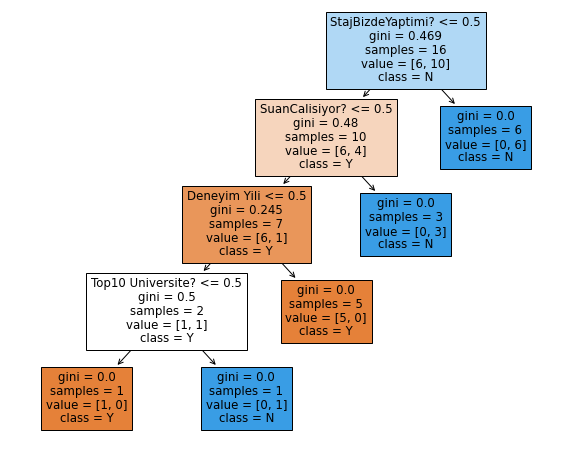

In [40]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.savefig("desicion_tree.png")
plt.show()
